<a href="https://colab.research.google.com/github/Kuruwu/NeuralNetwork/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Dataset of Diabetes .csv')

In [4]:
#Trim the Customer ID and Patient no from the table and seperate out the result into another table
X = pd.DataFrame(dataset.iloc[:, 2:13].values)
Y = dataset.iloc[:, 13].values
print(Y)
print(X)

['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y

In [5]:
#Y = np.char.strip(Y)
#print(Y)

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_0 = LabelEncoder()
X.loc[:, 0] = labelencoder_X_0.fit_transform(X.iloc[:, 0]) #Turning male and female into binary representation (0 or 1)
print(X)

    0   1     2   3     4    5    6    7    8     9     10
0    0  50   4.7  46   4.9  4.2  0.9  2.4  1.4   0.5  24.0
1    1  26   4.5  62   4.9  3.7  1.4  1.1  2.1   0.6  23.0
2    0  50   4.7  46   4.9  4.2  0.9  2.4  1.4   0.5  24.0
3    0  50   4.7  46   4.9  4.2  0.9  2.4  1.4   0.5  24.0
4    1  33   7.1  46   4.9  4.9  1.0  0.8  2.0   0.4  21.0
..  ..  ..   ...  ..   ...  ...  ...  ...  ...   ...   ...
995  1  71  11.0  97   7.0  7.5  1.7  1.2  1.8   0.6  30.0
996  1  31   3.0  60  12.3  4.1  2.2  0.7  2.4  15.4  37.2
997  1  30   7.1  81   6.7  4.1  1.1  1.2  2.4   8.1  27.4
998  1  38   5.8  59   6.7  5.3  2.0  1.6  2.9  14.0  40.5
999  1  54   5.0  67   6.9  3.8  1.7  1.1  3.0   0.7  33.0

[1000 rows x 11 columns]


In [7]:
onehotencoder = OneHotEncoder(categories='auto', sparse_output=False)
Y = onehotencoder.fit_transform(Y.reshape(-1, 1))
print(Y) #Formatting The Classes N P Y into a binary matrix
classes_order = onehotencoder.categories_[0]
print(classes_order)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
['N' 'P' 'Y']


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) #20% of dataset will be used for testing.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #Normalize the data
print(X_test)
print(X_train)

[[ 0.86634118 -2.82406172 -0.55374694 ... -0.00926875 -0.29117027
   1.4760338 ]
 [ 0.86634118 -0.25508285  0.10876351 ... -0.54208306 -0.45133727
   0.09798425]
 [ 0.86634118  0.30339082 -0.65312351 ...  0.70115033 -0.21108677
   0.49171269]
 ...
 [-1.15427965 -2.26558805  0.17501456 ...  1.14516226 -0.10430876
  -1.28006531]
 [ 0.86634118 -0.25508285 -0.4874959  ... -0.80849021 -0.10430876
   1.08230536]
 [ 0.86634118 -1.14864072 -0.25561724 ... -0.63088544 -0.29117027
  -0.09887998]]
[[ 0.86634118  0.97355922 -0.0568641  ... -0.09807113 -0.26447577
   0.09798425]
 [ 0.86634118 -0.14338811  0.07563799 ... -0.09807113 -0.26447577
  -0.2957442 ]
 [-1.15427965  0.86186449 -0.61999799 ... -1.51890929 -0.10430876
   1.27916958]
 ...
 [ 0.86634118  0.41508555 -0.35499381 ... -0.09807113 -0.26447577
   0.09798425]
 [ 0.86634118  0.19169609 -0.85187665 ...  0.8787551  -0.07761426
   1.27916958]
 [ 0.86634118  0.75016976 -0.32186828 ... -1.07489737 -0.21108677
   0.88544114]]


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#The term "dense" implies that each neuron in this layer is connected to every neuron in the previous layer, forming a fully connected layer.

In [11]:
classifier = Sequential() #Creating our model

In [12]:
#Input and Hidden Layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
#Add 6 neurons to our layer that takes 11 inputs (Each column). RELU activation.

In [13]:
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu')) #Hidden Layer 2

In [14]:
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='softmax')) #Output Layer (3 Outputs for 3 Possible Values N P Y)

In [15]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history=classifier.fit(X_train, Y_train, batch_size = 10, epochs = 80)

Epoch 1/80
80/80 [==============================] - 7s 5ms/step - loss: 1.0342 - accuracy: 0.8325
Epoch 2/80
80/80 [==============================] - 1s 8ms/step - loss: 0.7085 - accuracy: 0.8350
Epoch 3/80
80/80 [==============================] - 1s 7ms/step - loss: 0.4103 - accuracy: 0.8350
Epoch 4/80
80/80 [==============================] - 1s 8ms/step - loss: 0.3458 - accuracy: 0.8350
Epoch 5/80
80/80 [==============================] - 1s 7ms/step - loss: 0.3245 - accuracy: 0.8350
Epoch 6/80
80/80 [==============================] - 1s 8ms/step - loss: 0.3106 - accuracy: 0.8350
Epoch 7/80
80/80 [==============================] - 1s 8ms/step - loss: 0.2999 - accuracy: 0.8350
Epoch 8/80
80/80 [==============================] - 1s 8ms/step - loss: 0.2908 - accuracy: 0.8350
Epoch 9/80
80/80 [==============================] - 0s 5ms/step - loss: 0.2828 - accuracy: 0.8350
Epoch 10/80
80/80 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.8350
Epoch 11/80
80/80 [

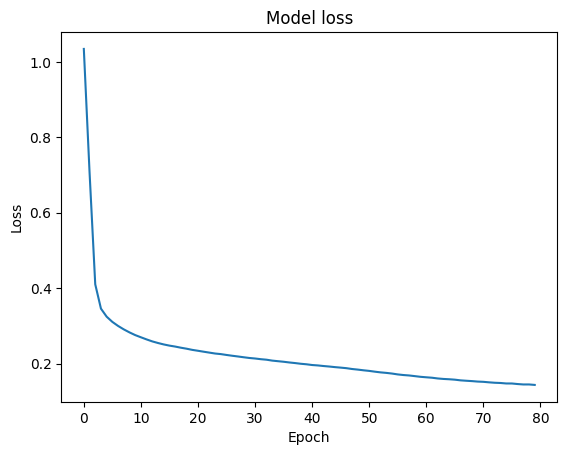

In [17]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [18]:
loss, accuracy = classifier.evaluate(X_test, Y_test) #Using test data

#Print the loss and accuracy (metrics)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.1339 - accuracy: 0.9500
Test Loss: 0.13392429053783417
Test Accuracy: 0.949999988079071


In [19]:
#Get predictions on the test data
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:")
print(cm)

7/7 [==============================] - 0s 2ms/step
Confusion Matrix:
[[ 16   0   0]
 [  0   3   5]
 [  5   0 171]]


In [21]:
#Show the probabilities of each class between 0 and 1 using scientific notation.
y_probabilities = classifier.predict(X_test)
#Round to two decimal places for readability.
y_probabilities = np.round(y_probabilities, decimals=2)
print(y_probabilities)

7/7 [==============================] - 0s 4ms/step
[[0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.04 0.96]
 [0.77 0.15 0.07]
 [0.   0.   1.  ]
 [0.   0.02 0.98]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.77 0.15 0.07]
 [0.   0.22 0.78]
 [0.73 0.18 0.09]
 [0.77 0.15 0.07]
 [0.77 0.15 0.07]
 [0.61 0.25 0.14]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.77 0.15 0.07]
 [0.16 0.45 0.39]
 [0.   0.   1.  ]
 [0.77 0.15 0.07]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.04 0.96]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.14 0.46 0.41]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1